In [3]:
import networkx as nx
import pandas as pd
import numpy as np

In [4]:
pwd

'C:\\Users\\djaniak\\Uni\\ONoS\\project'

## Load the data

In [5]:
data_april_2019 = pd.read_csv(r'data/2019_04_01-2019_05_01.csv')

C:\Users\djaniak\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
data_april_2019 = data_april_2019.drop(columns=[data_april_2019.columns[0]])

In [7]:
data_april_2019.shape

(9501107, 5)

In [8]:
data_april_2019['block_timestamp'] = pd.to_datetime(data_april_2019['block_timestamp']).dt.tz_convert(None)

In [9]:
data_april_2019.dtypes

from_address               object
to_address                 object
value                      object
nonce                       int64
block_timestamp    datetime64[ns]
dtype: object

In [10]:
data_april_2019.head()

,from_address,to_address,value,nonce,block_timestamp
0,0x596a2453f42d37831395907f1e807cb7f2077a20,0xddddddd1fd4e3708869c00cabe6b0b9d15181bb9,2.9e+17,9056,2019-04-08 21:15:22
1,0x22a8758b1746648d0928dedbbbc5d8a54dd69840,0xae76c84c9262cdb9abc0c2c8888e62db8e22a0bf,3.2033e+17,520,2019-04-08 10:30:19
2,0x22a8758b1746648d0928dedbbbc5d8a54dd69840,0xae76c84c9262cdb9abc0c2c8888e62db8e22a0bf,2.93865e+17,535,2019-04-08 23:04:08
3,0x2ee0e32d6c996e42320aa53fdd6fb65649a82e57,0x95428ac02714244929215638f8f99e9a5a43c8ed,2.4e+17,2055,2019-04-08 19:46:56
4,0xe6115d578dd67c9f7835209105d132e1eea6953d,0x196301b5673714fa91640fe2df34b5c05be7ab19,2e+16,455,2019-04-08 00:59:20


In [11]:
data_may_2019 = pd.read_csv(r'data/2019_05_01-2019_06_01.csv')
data_may_2019 = data_may_2019.drop(columns=[data_may_2019.columns[0]])

In [12]:
data_may_2019['block_timestamp'] = pd.to_datetime(data_may_2019['block_timestamp']).dt.tz_convert(None)

In [13]:
data_may_2019.shape

(10742096, 5)

In [14]:
data_may_2019.dtypes

from_address               object
to_address                 object
value                      object
nonce                       int64
block_timestamp    datetime64[ns]
dtype: object

In [13]:
data_may_2019.head()

,from_address,to_address,value,nonce,block_timestamp
0,0x368a7b122181dcfc6e19e4379d79c6af034e238f,0xae9b8e05c22bae74d1e8db82c4af122b18050bd4,1e+16,1730,2019-05-10 13:48:23
1,0x461ae8c33224aceb7f1259095dd2a334ad20f322,0xd73be539d6b2076bab83ca6ba62dfe189abc6bbe,1.108e+15,990,2019-05-10 23:49:29
2,0x2108980bc5faee9dc7326c3d2f7198c40b6d3122,0xcbc6a023eb975a1e2630223a7959988948e664f3,1.3e+17,159,2019-05-10 22:14:26
3,0x5763542e5de5f524037b6c90623d00e0d6099bde,0xf4985070ce32b6b1994329df787d1acc9a2dd9e2,2.93462e+16,582,2019-05-10 22:58:26
4,0x2b99fe1933eb1abf4836e3da8b7b41e7fdd5f59e,0xf4985070ce32b6b1994329df787d1acc9a2dd9e2,1.83528e+16,70,2019-05-10 17:35:37


In [14]:
data = data_may_2019[(data_may_2019['block_timestamp'].dt.day == 1) & 
                    (data_may_2019['block_timestamp'].dt.hour == 12)]

In [36]:
data.to_csv("data_may1_12.csv", index=False)

## Create a graph

In [ ]:
# graph_april_daily = [nx.from_pandas_edgelist(data_april_2019[data_april_2019['block_timestamp'].dt.day == i], source='from_address', target='to_address', edge_attr='value') for i in range(1, 31)]

In [34]:
graph = nx.from_pandas_edgelist(data, source='from_address', target='to_address', edge_attr=['value', 'nonce', 'block_timestamp'], create_using=nx.DiGraph)

In [ ]:
nodes = data_april_2019[(data_april_2019['block_timestamp'].dt.day == 1) &
                       (data_april_2019['block_timestamp'].dt.hour == 12)][['from_address', 'to_address']]

In [35]:
len(graph)

12578

# Load JSON with scams

In [15]:
pd.read_json(r'data/scamer_addresses.json')

,success,result
0x00067010f3Ae17aa53e2B4d5142DDA35380cf72D,True,"[{'id': 'eccc29', 'name': 'calibra-ico.info', ..."
0x0020731604C882cF7bF8C444BE97d17b19Ea4316,True,"[{'id': '588460', 'name': 'decentralized-launc..."
0x002Bf459dC58584D58886169EA0E80f3Ca95FFAF,True,"[{'id': '0f772d', 'name': 'ethergifting.com', ..."
0x002f0C8119C16D310342D869Ca8bF6AcE34D9c39,True,"[{'id': '401749', 'name': 'eth-pay.org', 'type..."
0x0059b14e35daB1b4EEe1e2926C7A5660dA66F747,True,"[{'id': '3838c4', 'name': 'gifto.tech', 'type'..."
...,...,...
rw9kHpRE52nza51KnG1ndDqw9Lo1mcQM6r,True,"[{'id': 'e16be0', 'name': 'xrpcompetition.live..."
rwjjriYwWsE3ntaMP2DasPh8LgJSZiAMig,True,"[{'id': '1e8cb2', 'name': 'ripplenet.limited',..."
rwpMvfxoodXggJ1g4qv6MWAPQqWDwQyHUW,True,"[{'id': '107f07', 'name': 'crypto-generat.ml',..."
t1KAedN3mupcum5ffF7DF5KNz27vRB9pYnr,True,"[{'id': '9833a2', 'name': 'dexcompetition.site..."


In [16]:
df_scams = pd.read_json(r'data/scamer_addresses.json').explode('result').result.apply(pd.Series).reset_index(drop=True)
df_scams.head()

,id,name,type,url,hostname,featured,path,category,subcategory,description,reporter,ip,severity,statusCode,status,updated,address
0,eccc29,calibra-ico.info,scam,http://calibra-ico.info,calibra-ico.info,0,/*,Phishing,Calibra,Fake Calibra crowdsale site,CryptoScamDB,None,1.0,None,None,1.590324e+12,0x00067010f3Ae17aa53e2B4d5142DDA35380cf72D
1,588460,decentralized-launch.com,scam,http://decentralized-launch.com,decentralized-launch.com,0,/*,Scamming,Trust-Trading,Trust trading scam site - fake BNB giveaway,CryptoScamDB,None,1.0,None,None,1.590320e+12,0x0020731604C882cF7bF8C444BE97d17b19Ea4316
2,0f772d,ethergifting.com,scam,https://ethergifting.com,ethergifting.com,0,/*,Scamming,Trust-Trading,Trust trading scam site,CryptoScamDB,None,1.0,None,None,1.590320e+12,0x002Bf459dC58584D58886169EA0E80f3Ca95FFAF
3,401749,eth-pay.org,scam,http://eth-pay.org,eth-pay.org,0,/*,Scamming,Trust-Trading,Trust trading scam site,CryptoScamDB,None,1.0,None,None,1.590320e+12,0x002f0C8119C16D310342D869Ca8bF6AcE34D9c39
4,3838c4,gifto.tech,scam,http://gifto.tech,gifto.tech,0,/*,Phishing,Gifto,Fake airdrop site asking for private keys. Sus...,CryptoScamDB,None,1.0,None,None,1.590320e+12,0x0059b14e35daB1b4EEe1e2926C7A5660dA66F747


In [17]:
df_scam_transactions = pd.read_csv(r'data/scam_transactions_20190101_20190701.csv')
df_scam_transactions = df_scam_transactions.drop(columns=df_scam_transactions.columns[0])
df_scam_transactions.head()

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,receipt_contract_address,receipt_root,receipt_status,block_timestamp,block_number,block_hash
0,0xd77ef0c067c6cf368c556a83988fe7c960ed12e63ec8...,0,86,0xf1c058ae62f2d25efebdd809eedc609cbb9a5090,0x3d49008a303fb8a85b983831d4a4399df3916266,1.999139e+18,21000,41000000000,0x,1892745,21000,NaN,NaN,1,2019-06-04 18:04:00+00:00,7894349,0xd27eb22079a3899ebe05407c5fa312fc7d1731452e06...
1,0x62a59bb2dddc0042435dec95d8c6c7708f446a80604b...,0,7,0xf33142f5bb228516f93e4267fb5a7241dc241614,0xeb788abad9bf783893496393a5d7f7c2f359d16e,9.991390e+17,21000,41000000000,0x,673205,21000,NaN,NaN,1,2019-02-13 03:46:26+00:00,7213622,0x07cf2d0194224a3675980309c5f0635f8236e9ab2d3a...
2,0x1f1e5a28f0b2e84353b3da6914369447f2a6f5b79034...,2,86,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,0x4fed1fc4144c223ae3c1553be203cdfcbd38c581,8.950000e+15,21000,5000000000,0x,3506936,21000,NaN,NaN,1,2019-02-13 04:12:52+00:00,7213711,0x7435104b7a0ef7c2753e357574ebb7d3877d9e8a1a36...
3,0x55aefd51df69b080b091ccf8dab7d590f658795c7b5e...,14,4,0xdecaf9cd2367cdbb726e904cd6397edfcae6068d,0x55296f69f40ea6d20e478533c15a6b08b654e758,0.000000e+00,38355,41000000000,0xa9059cbb0000000000000000000000008630a8d1318d...,139028,23355,NaN,NaN,1,2019-02-13 00:33:36+00:00,7213109,0x7d10ee7e45cabf0442c8d1e1d12186fb337c38455317...
4,0xa5a3512fba18f0d179538664d2fa9d73467486638256...,25,100,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,0x4fed1fc4144c223ae3c1553be203cdfcbd38c581,7.770000e+14,21000,2000000000,0x,5817287,21000,NaN,NaN,1,2019-06-18 23:03:46+00:00,7985128,0x25236dd359cbf155dc3cd2f1a6401045569e327ed6b3...


In [18]:
df_scams[df_scams['address'] == '0x3d49008a303fb8a85b983831d4a4399df3916266']

,id,name,type,url,hostname,featured,path,category,subcategory,description,reporter,ip,severity,statusCode,status,updated,address


In [19]:
scam_addresses = df_scams['address'].unique()

In [20]:
data_may_2019[data_may_2019['from_address'].isin(scam_addresses)].shape

(32, 5)

In [21]:
data_may_2019[data_may_2019['from_address'].isin(scam_addresses)]

,from_address,to_address,value,nonce,block_timestamp
120805,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,0x4fed1fc4144c223ae3c1553be203cdfcbd38c581,9.895e+16,12,2019-05-18 16:48:25
149864,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,0x4fed1fc4144c223ae3c1553be203cdfcbd38c581,2.8749e+15,15,2019-05-20 05:48:27
496618,0xbad41e5412ebaf22b8ec127521060fd9fa29bbdd,0x0064454b14cddc990ed6520ef94d3e28fe7c41b6,4.66e+14,13,2019-05-17 04:07:38
539673,0x482729ad79e5da6c48c0e7a4b3e67ba13ceb7404,0x4fed1fc4144c223ae3c1553be203cdfcbd38c581,1.4868e+16,16,2019-05-01 01:28:38
765663,0x7a023247e70ad842b0c1226e09185b461a1cd47d,0x4fed1fc4144c223ae3c1553be203cdfcbd38c581,5.0395e+17,0,2019-05-26 03:51:50
1065608,0x0d6e198892a124fde9956d581b193832e3a8f583,0x0064454b14cddc990ed6520ef94d3e28fe7c41b6,1.272e+15,10,2019-05-18 04:04:34
2147675,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,0x4fed1fc4144c223ae3c1553be203cdfcbd38c581,8.61e+14,11,2019-05-17 22:20:59
2227392,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,0x4fed1fc4144c223ae3c1553be203cdfcbd38c581,1.70586e+18,18,2019-05-22 08:12:08
2315419,0x482729ad79e5da6c48c0e7a4b3e67ba13ceb7404,0x4fed1fc4144c223ae3c1553be203cdfcbd38c581,8.841e+15,17,2019-05-09 20:37:26
2328915,0x336a3f0c4d40b1e39cee72e2e59330daf484848c,0xaafae6690d3c4605a313649116632d89b2d64d94,5.98e+16,93,2019-05-25 06:54:43


In [22]:
transactions_to_analyse = data_may_2019[data_may_2019['from_address'].isin(scam_addresses)]
transactions_to_analyse = transactions_to_analyse.append(data_may_2019[data_may_2019['to_address'].isin(scam_addresses)])
transactions_to_analyse = transactions_to_analyse.append(data_april_2019[data_april_2019['from_address'].isin(scam_addresses)])
transactions_to_analyse = transactions_to_analyse.append(data_april_2019[data_april_2019['to_address'].isin(scam_addresses)])
transactions_to_analyse.drop_duplicates(inplace=True)
transactions_to_analyse.shape

(137, 5)

In [23]:
transactions_to_analyse['from_address'].nunique()

74

In [24]:
transactions_to_analyse['to_address'].nunique()

23

In [24]:
transactions_to_analyse

,from_address,to_address,value,nonce,block_timestamp
120805,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,0x4fed1fc4144c223ae3c1553be203cdfcbd38c581,9.895e+16,12,2019-05-18 16:48:25
149864,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,0x4fed1fc4144c223ae3c1553be203cdfcbd38c581,2.8749e+15,15,2019-05-20 05:48:27
496618,0xbad41e5412ebaf22b8ec127521060fd9fa29bbdd,0x0064454b14cddc990ed6520ef94d3e28fe7c41b6,4.66e+14,13,2019-05-17 04:07:38
539673,0x482729ad79e5da6c48c0e7a4b3e67ba13ceb7404,0x4fed1fc4144c223ae3c1553be203cdfcbd38c581,1.4868e+16,16,2019-05-01 01:28:38
765663,0x7a023247e70ad842b0c1226e09185b461a1cd47d,0x4fed1fc4144c223ae3c1553be203cdfcbd38c581,5.0395e+17,0,2019-05-26 03:51:50
...,...,...,...,...,...
8792190,0xd551234ae421e3bcba99a0da6d736074f22192ff,0x482729ad79e5da6c48c0e7a4b3e67ba13ceb7404,1.1008e+18,1368888,2019-04-01 21:52:17
8948610,0xfcb356b88765502b05ac135d3530c65113d99f4b,0x71c7656ec7ab88b098defb751b7401b5f6d8976f,4.71013e+14,1631,2019-04-29 18:12:48
9042739,0xe83dc1d9f5aa8223acb090be5c14877df8c3f71b,0x482729ad79e5da6c48c0e7a4b3e67ba13ceb7404,1.33296e+17,22775,2019-04-02 20:41:15
9322439,0x4a96a62f191a0b9db56ed4efe227563efe40e265,0x482729ad79e5da6c48c0e7a4b3e67ba13ceb7404,1.33998e+17,0,2019-04-24 09:27:07


In [25]:
data_concat = pd.concat([data_may_2019, data_april_2019])

In [26]:
G_all = nx.from_pandas_edgelist(data_concat, source='from_address', target='to_address', edge_attr=['value', 'nonce', 'block_timestamp'], create_using=nx.Graph)

In [122]:
G_may = nx.from_pandas_edgelist(data_may_2019, source='from_address', target='to_address', edge_attr=['value', 'nonce', 'block_timestamp'], create_using=nx.DiGraph)

In [27]:
n = nx.all_neighbors(G_all, '0x4fed1fc4144c223ae3c1553be203cdfcbd38c581')
len([i for i in n])

17709

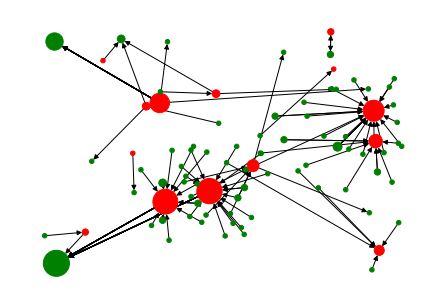

In [33]:
import matplotlib.pyplot as plt
G = nx.from_pandas_edgelist(transactions_to_analyse, source='from_address', target='to_address', edge_attr=['value', 'nonce', 'block_timestamp'], create_using=nx.MultiDiGraph)

color_map = []
d = dict(G.degree)

# nx.draw(g, nodelist=d.keys(), node_size=[v * 100 for v in d.values()])
for node in G:
#     if node == '0xd551234ae421e3bcba99a0da6d736074f22192ff':
#         color_map.append('blue')
    if node in scam_addresses:
        color_map.append('red')
    else: 
        color_map.append('green')
import math
pos = nx.spring_layout(G,k=0.1,iterations=10)
nx.draw(G, pos=pos, node_color=color_map, node_size=[v * 20 for v in d.values()])
plt.show()

In [34]:
neighbours = []
for node in G:
    if node not in scam_addresses:
        neighbours.append([n for n in nx.all_neighbors(G_all, node)])

In [35]:
neighbours = [item for sublist in neighbours for item in sublist]

In [36]:
neighbours = list(set(neighbours))

In [37]:
len(neighbours)

304240

In [49]:
import random
sampled_addresses = random.sample(neighbours, 2000)

In [41]:
unique_addresses = data_concat['to_address'].unique() + data_concat['to_address'].unique()

In [50]:
sampled_addresses2 = random.sample(list(unique_addresses), 2000)

In [51]:
final_data = pd.concat([data_concat[data_concat['to_address'].isin(sampled_addresses)],
                      data_concat[data_concat['from_address'].isin(sampled_addresses)],
                      data_concat[data_concat['to_address'].isin(sampled_addresses2)],
                      data_concat[data_concat['to_address'].isin(sampled_addresses2)]])
final_data.shape

(19044, 5)

In [52]:
final_data.head()

,from_address,to_address,value,nonce,block_timestamp
3608,0x0f1826d0fd45d86ff8c35870a1dc65240cb32279,0xe33c85d82e1c1e1b6445b0dfe5d1ef83ff5791b1,1.5e+17,50,2019-05-10 03:47:14
3924,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0x6cf663b628edf91c939e883235377df8055a575e,5.0196e+16,20442083,2019-05-10 18:11:18
6666,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0xe930ce36d9a25b21d845a9a1e4c956a90824671e,1.00119e+16,20433139,2019-05-10 05:54:03
7490,0x3caf346444d74c1d0dbde9e763915508b0026c37,0xee97c5f87f1d2335ac79a4de131822e3db9b90dc,2e+18,217,2019-05-10 05:02:44
8071,0x97e12bd75bdee72d4975d6df410d2d145b3d8457,0xa59e5d7941a81abf3398a72d214dd8096e5744a4,7.09637e+16,96860,2019-05-10 06:58:48


In [56]:
def is_scam(row):
    if row["from_address"] in scam_addresses or row["to_address"] in scam_addresses:
        return 1 
    return 0

final_data_scams = pd.concat([final_data, transactions_to_analyse])

final_data_scams["scam"] = final_data_scams.apply(lambda row: is_scam(row), axis=1)

In [57]:
final_data_scams.shape

(19181, 6)

In [59]:
final_data_scams["scam"].value_counts()

0    19044
1      137
Name: scam, dtype: int64

In [58]:
final_data_scams.head()

,from_address,to_address,value,nonce,block_timestamp,scam
3608,0x0f1826d0fd45d86ff8c35870a1dc65240cb32279,0xe33c85d82e1c1e1b6445b0dfe5d1ef83ff5791b1,1.5e+17,50,2019-05-10 03:47:14,0
3924,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0x6cf663b628edf91c939e883235377df8055a575e,5.0196e+16,20442083,2019-05-10 18:11:18,0
6666,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0xe930ce36d9a25b21d845a9a1e4c956a90824671e,1.00119e+16,20433139,2019-05-10 05:54:03,0
7490,0x3caf346444d74c1d0dbde9e763915508b0026c37,0xee97c5f87f1d2335ac79a4de131822e3db9b90dc,2e+18,217,2019-05-10 05:02:44,0
8071,0x97e12bd75bdee72d4975d6df410d2d145b3d8457,0xa59e5d7941a81abf3398a72d214dd8096e5744a4,7.09637e+16,96860,2019-05-10 06:58:48,0


In [61]:
final_data_scams.to_csv("final_data_scam.csv", index=False)

C:\Users\djaniak\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\djaniak\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


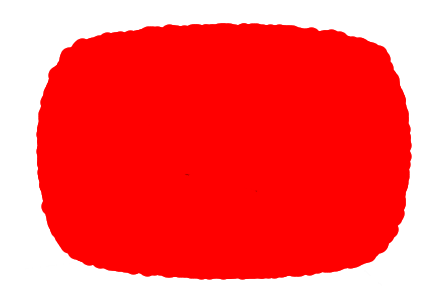

In [60]:
G_final = nx.from_pandas_edgelist(final_data, source='from_address', target='to_address', edge_attr=['value', 'nonce', 'block_timestamp'], create_using=nx.MultiDiGraph)

pos = nx.spring_layout(G_final, k=0.1,iterations=10)
nx.draw(G_final, pos=pos)
plt.show()